In [1]:
import csv
import os

def read_statfile(filename):
    x =[]
    y = []

    with open(f'{working_dir}/{filename}', newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            x.append(row[0])
            y.append(round(float(row[1]), 2))
    return x, y

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def plot_difficulty_lights(difficulty):
    
    x_total, y_total = read_statfile(f'success_{difficulty}_across_light_settings.csv')
    x_bright, y_bright = read_statfile(f'success_{difficulty}_light_bright.csv')
    x_standard, y_standard = read_statfile(f'success_{difficulty}_light_standard.csv')
    x_dark, y_dark = read_statfile(f'success_{difficulty}_light_dark.csv')
    
    
    plt.plot(x_total , y_total, linestyle='-', color='b', label=f'overall')
    plt.plot(x_bright , y_bright, linestyle=':',color='y', label=f'bright')
    plt.plot(x_standard , y_standard, linestyle='-.',color='g', label=f'standard')
    plt.plot(x_dark , y_dark, linestyle='--',color='m', label=f'dark')
    plt.title(f'success rates for {difficulty}')
    plt.legend()
    plt.savefig(f'{working_dir}/{difficulty}_success_rate_comparison.png')
    plt.show()

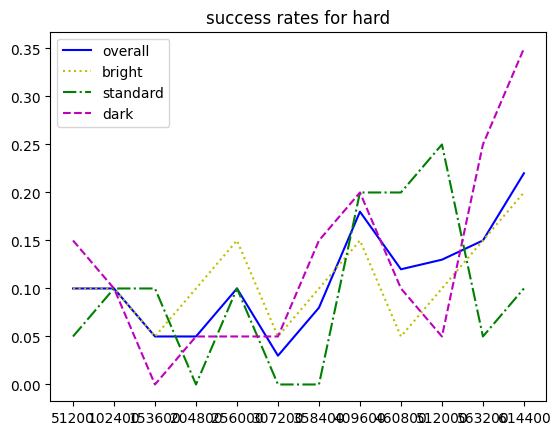

In [3]:
working_dir = "hard_standard_eval"

plot_difficulty_lights(difficulty = "hard")

In [4]:
def plot_difficulty_comparison():
    plt.close()
    
    x_total, y_total = read_statfile(f'success_rate.csv')
    x_easy, y_easy = read_statfile(f'success_easy_across_light_settings.csv')
    x_medium, y_medium = read_statfile(f'success_medium_across_light_settings.csv')
    x_hard, y_hard = read_statfile(f'success_hard_across_light_settings.csv')
    
    
    plt.plot(x_total , y_total, linestyle='-', color='b', label=f'total')
    plt.plot(x_easy , y_easy, linestyle=':',color='y', label=f'easy')
    plt.plot(x_medium , y_medium, linestyle='-.',color='g', label=f'medium')
    plt.plot(x_hard , y_hard, linestyle='--',color='m', label=f'hard')
    plt.title(f'success rates (accross light settings)')
    plt.legend()
    plt.savefig(f'{working_dir}/all_difficulties_success_rate_comparison')

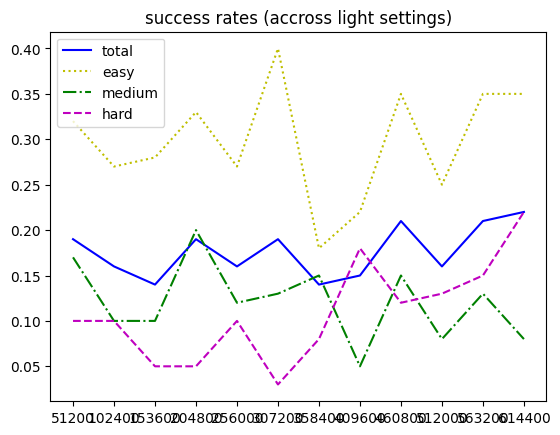

In [5]:
plot_difficulty_comparison()

# individual success rates

Barplot
y-Axis: one achieved success rate (e.g. medium standard)
x-Axis: training settings

In [6]:
isolated_light_settings = ("bright", "standard", "dark")
isolated_difficulty_settings = ("easy", "medium", "hard")


def get_success_rate_isolated(sr_name, light, difficulty):
    target_dir = f'results/isolated_runs_results/{difficulty}-{light}/eval'
    
    filename = f'{target_dir}/success_{sr_name}.csv'
    print(f'filename {filename}')
    
    x =[]
    y = []

    with open(filename, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            x.append(row[0])
            y.append(round(float(row[1]), 2))
            
    success_rate = y[-1]
    # final success_rate is the very last entry
    # the sb3_ppo.py is written to do an eval (on the best model) after training
        
    return success_rate
    

def get_success_rates_isolated(sr_name):
    srs= {}
    for light in isolated_light_settings:
        ls_srs = []
        
        for difficulty in isolated_difficulty_settings:
            difficulty_success_rate = get_success_rate_isolated(sr_name, light, difficulty)
            ls_srs.append(difficulty_success_rate)
        
        
        srs[light] = ls_srs
    return srs

def success_rate_bar_plot_by_training_setting(sr_name):
    
    success_rates = {
        'bright': (18.35, 18.43, 14.98),
        'standard': (38.79, 48.83, 47.50),
        'dark': (189.95, 195.82, 217.19),
    }
    
    success_rates = get_success_rates_isolated(sr_name)
    
    

    x = np.arange(len(isolated_difficulty_settings))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')

    for light_setting, difficulty_achieved_sr in success_rates.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, difficulty_achieved_sr, width, label=light_setting)
        ax.bar_label(rects, padding=3)
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel(f'{sr_name}')
    ax.set_title(f'{sr_name} for isolated training settings')
    ax.set_xticks(x + width, isolated_difficulty_settings)
    ax.legend(loc='upper left') #, ncols=3)
    ax.set_ylim(0, 1)

    plt.show()

filename results/isolated_runs_results/easy-bright/eval/success_easy_standard.csv
filename results/isolated_runs_results/medium-bright/eval/success_easy_standard.csv
filename results/isolated_runs_results/hard-bright/eval/success_easy_standard.csv
filename results/isolated_runs_results/easy-standard/eval/success_easy_standard.csv
filename results/isolated_runs_results/medium-standard/eval/success_easy_standard.csv
filename results/isolated_runs_results/hard-standard/eval/success_easy_standard.csv
filename results/isolated_runs_results/easy-dark/eval/success_easy_standard.csv
filename results/isolated_runs_results/medium-dark/eval/success_easy_standard.csv
filename results/isolated_runs_results/hard-dark/eval/success_easy_standard.csv


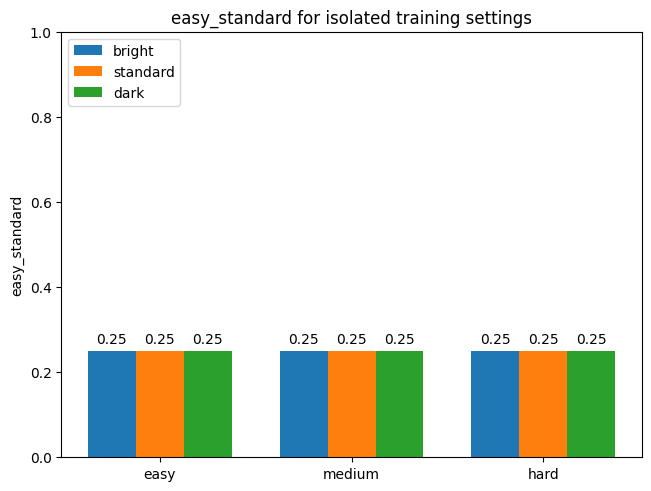

In [7]:
success_rate_bar_plot_by_training_setting(f'easy_standard')

# display results of one eval

In [8]:
color_mapping = {"overall": "blue", "bright":"yellow", "standard":"orange","dark":"red"}
color_mapping = {"overall": "blue", "bright":"lightgrey", "standard":"darkgrey","dark":"dimgrey"}

color_mapping = {"overall": "#a2a2a2", "bright":"#9cd2f6", "standard":"#158fe0","dark":"#0d5686"}
# https://www.colorhexa.com/106daa

def get_success_rate(target_dir, sr_name):
    filename = f'results/{target_dir}/eval/success_{sr_name}.csv'
    
    
    x =[]
    y = []

    with open(filename, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            x.append(row[0])
            y.append(round(float(row[1]), 2))
            
    success_rate = y[-1]
    # final success_rate is the very last entry
    # the sb3_ppo.py is written to do an eval (on the best model) after training
        
    return success_rate

def get_collision_rate(target_dir, cr_name):
    filename = f'results/{target_dir}/eval_collision_rates/collision_rate_{cr_name}.csv'
    
    
    x =[]
    y = []

    with open(filename, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            x.append(row[0])
            y.append(round(float(row[1]), 2))
            
    
    return y[-1]

def all_success_rates_bar_plot(target_dir, legend_height="lower"):
    
    if not os.path.exists("notebook_images/"):
        os.mkdir("notebook_images/")
    
    light_settings = {"overall": [], "bright":[], "standard":[], "dark":[]}
    difficulties = ["easy","medium","hard"]
    
    overall_success_rate = 0
    
    for d in difficulties:
        for ls in light_settings.keys():
            if ls == "overall":
                sr_name = f'{d}'
            else:
                sr_name = f'{d}_{ls}'
            success_rate = get_success_rate(target_dir, sr_name)
            light_settings[ls].append(success_rate)
            
            if ls != "overall":
                overall_success_rate += success_rate
    
    print(f'overall success_rate: {overall_success_rate/9}')
    

    x = np.arange(len(difficulties))  # the label locations
    width = 0.2  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')

    for attribute, measurement in light_settings.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute, color = color_mapping[attribute])
        ax.bar_label(rects, padding=3)
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    
    ax.set_title(f'Success rates')
    ax.set_xticks(x + 1.5*width, difficulties)
    ax.legend(loc=f'{legend_height} right') #, ncols=3)
    
    #fig.tight_layout()
    filename = f'notebook_images/{target_dir}_all_success_rates_barplot.png'
    plt.savefig(filename)
    #plt.show()
    
def all_collision_rates_bar_plot(target_dir, legend_height = "lower"):
    
    if not os.path.exists("notebook_images/"):
        os.mkdir("notebook_images/")
    
    light_settings = {"overall": [], "bright":[], "standard":[], "dark":[]}
    difficulties = ["easy","medium","hard"]
    
    overall_collision_rate = 0
    
    for d in difficulties:
        for ls in light_settings.keys():
            if ls == "overall":
                cr_name = f'{d}'
            else:
                cr_name = f'{d}_{ls}'
            collision_rate = get_collision_rate(target_dir, cr_name)
            light_settings[ls].append(collision_rate)
            
            if ls != "overall":
                overall_collision_rate += collision_rate
    
    print(f'overall collision_rate: {overall_collision_rate/9}')
    

    x = np.arange(len(difficulties))  # the label locations
    width = 0.2  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')

    for attribute, measurement in light_settings.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute, color = color_mapping[attribute])
        ax.bar_label(rects, padding=3)
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    
    ax.set_title(f'Collision rates')
    ax.set_xticks(x + 1.5*width, difficulties)
    ax.legend(loc=f'{legend_height} right') #, ncols=3)
    
    #fig.tight_layout()
    filename = f'notebook_images/{target_dir}_all_collision_rates_barplot.png'
    plt.savefig(filename)
    #plt.show()    

def light_setting_success_rates_bar_plot(target_dir, light_setting, title):
    
    if not os.path.exists("notebook_images/"):
        os.mkdir("notebook_images/")
    
    difficulties = ["easy","medium","hard"]
    success_rates = []
    
    for d in difficulties:
        
        if light_setting == "overall":
            sr_name = f'{d}'
        else:
            sr_name = f'{d}_{light_setting}'
        success_rate = get_success_rate(target_dir, sr_name)
        success_rates.append(success_rate)
        
    print(f'average success_rate for {light_setting}: {sum(success_rates)/3}')
    
    # https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_colors.html#sphx-glr-gallery-lines-bars-and-markers-bar-colors-py

    x = np.arange(len(difficulties))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')

    bars = ax.bar(difficulties, success_rates, label=difficulties, color=color_mapping[light_setting])

    ax.bar_label(bars)
    # Add some text for labels, title and custom x-axis tick labels, etc.
    
    ax.set_title(title)
    ax.set_xticks(x, difficulties)
    
    filename = f'notebook_images/{target_dir}_{light_setting}_success_rates_barplot.png'
    plt.savefig(filename)
    #plt.show()
    
def light_setting_collision_rates_bar_plot(target_dir, light_setting, title):
    
    if not os.path.exists("notebook_images/"):
        os.mkdir("notebook_images/")
    
    difficulties = ["easy","medium","hard"]
    collision_rates = []
    
    for d in difficulties:
        
        if light_setting == "overall":
            cr_name = f'{d}'
        else:
            cr_name = f'{d}_{light_setting}'
        collision_rate = get_collision_rate(target_dir, cr_name)
        collision_rates.append(collision_rate)
        
    print(f'average success_rate for {light_setting}: {sum(collision_rates)/3}')
    
    # https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_colors.html#sphx-glr-gallery-lines-bars-and-markers-bar-colors-py

    x = np.arange(len(difficulties))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')

    bars = ax.bar(difficulties, collision_rates, label=difficulties, color=color_mapping[light_setting])

    ax.bar_label(bars)
    # Add some text for labels, title and custom x-axis tick labels, etc.
    
    ax.set_title(title)
    ax.set_xticks(x, difficulties)
    
    filename = f'notebook_images/{target_dir}_{light_setting}_collision_rates_barplot.png'
    plt.savefig(filename)
    #plt.show()

# Question 1

Difficulty tracks

average success_rate for bright: 0.96
average success_rate for bright: 0.1366666666666667
average success_rate for standard: 0.9733333333333333
average success_rate for standard: 0.13333333333333333
average success_rate for dark: 0.9766666666666666
average success_rate for dark: 0.09333333333333334
average success_rate for overall: 0.9700000000000001
average success_rate for overall: 0.12
average success_rate for bright: 0.9933333333333333
average success_rate for bright: 0.2333333333333333
average success_rate for standard: 0.9966666666666667
average success_rate for standard: 0.23666666666666666
average success_rate for dark: 0.9899999999999999
average success_rate for dark: 0.20666666666666667
average success_rate for overall: 0.9933333333333333
average success_rate for overall: 0.22333333333333336


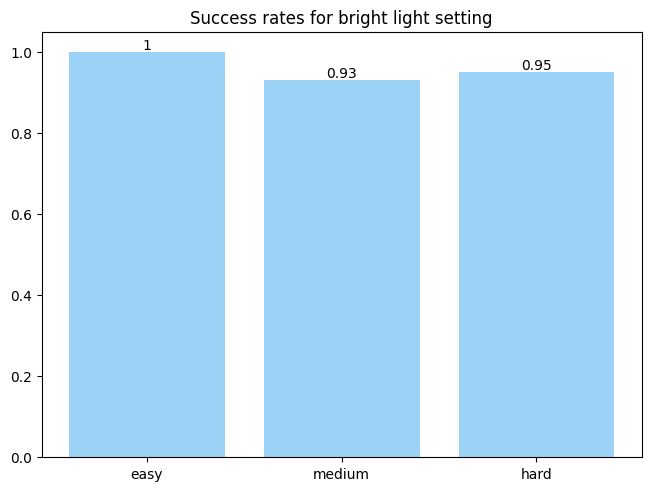

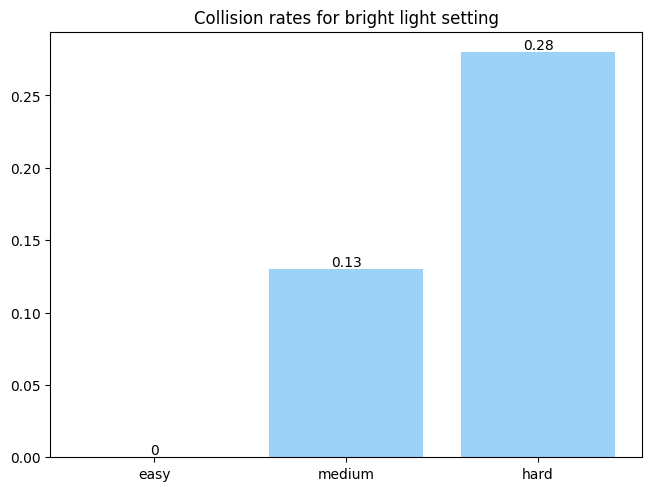

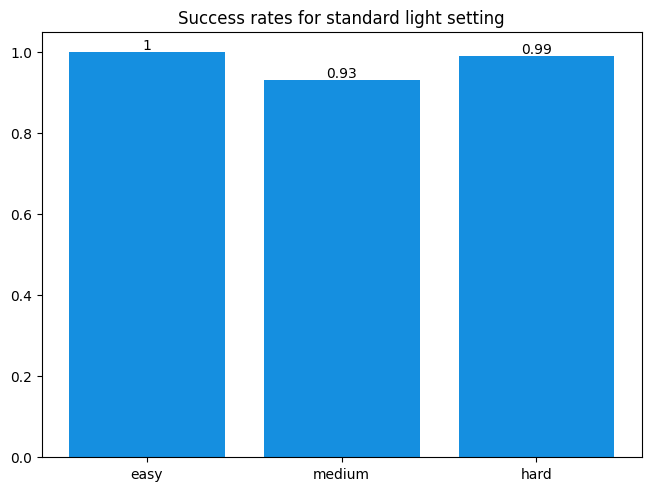

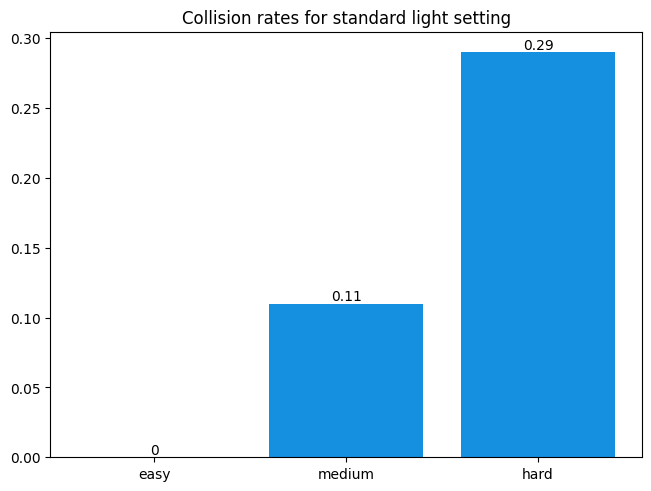

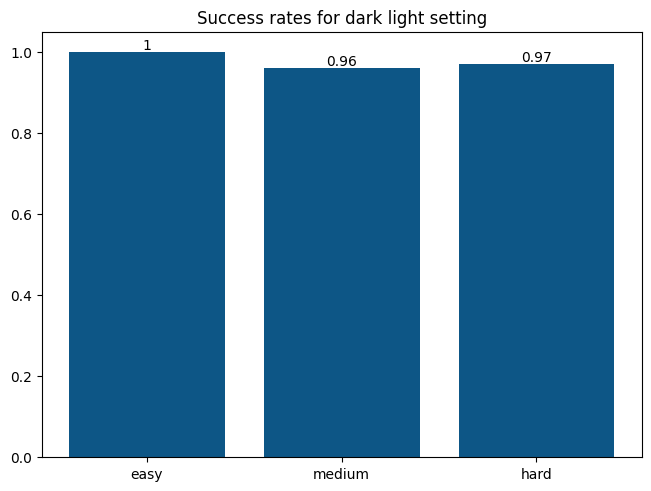

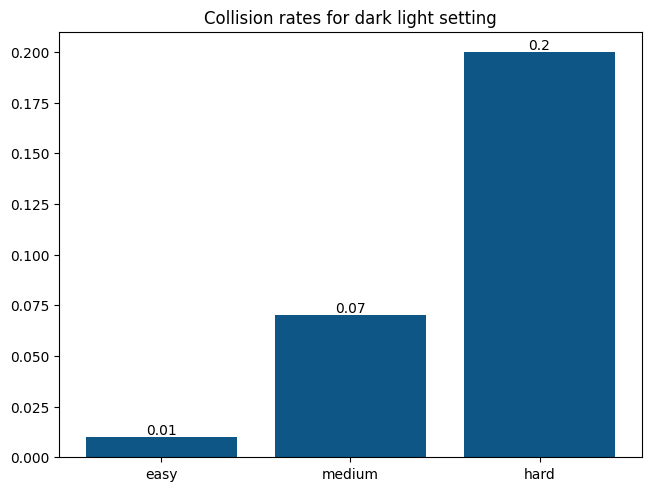

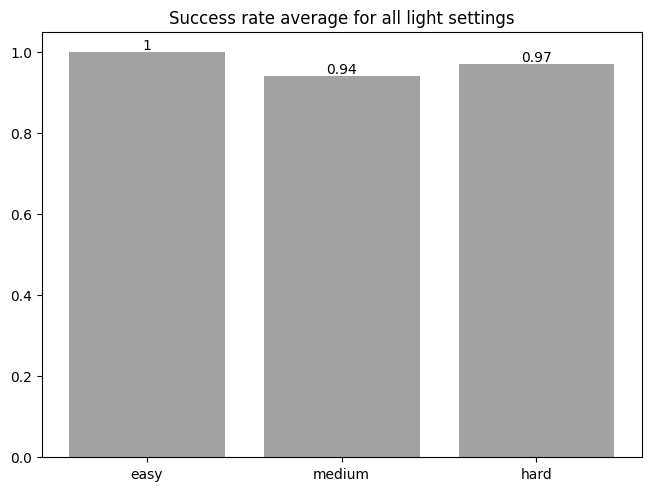

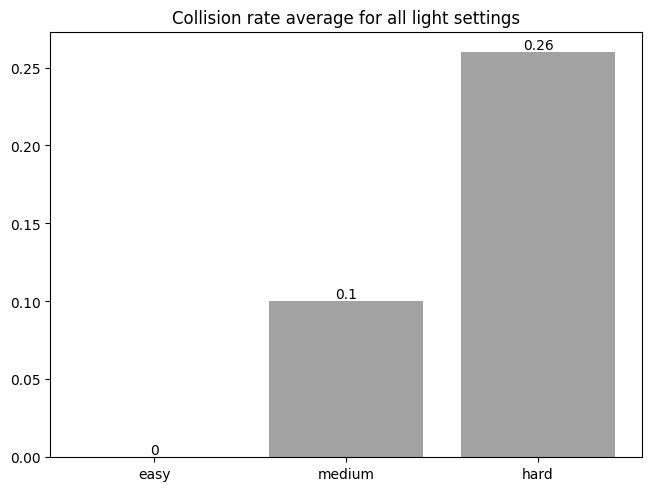

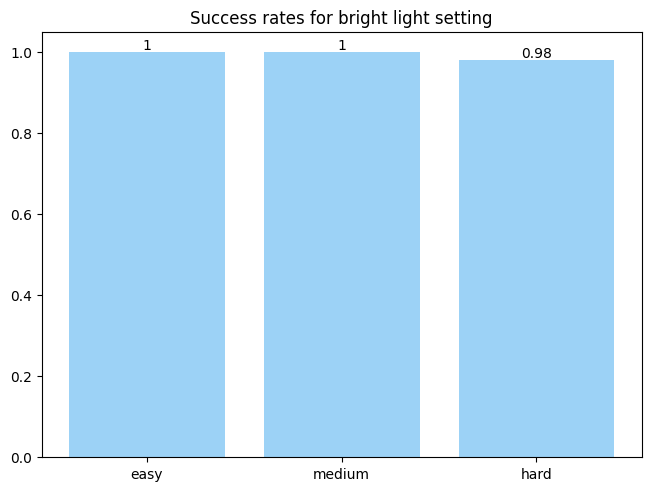

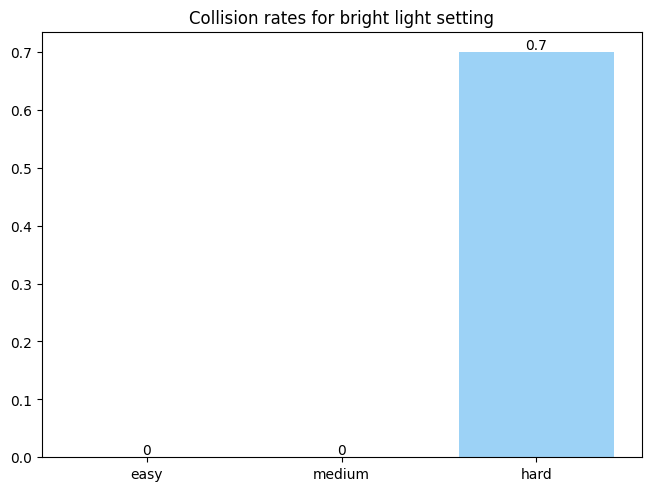

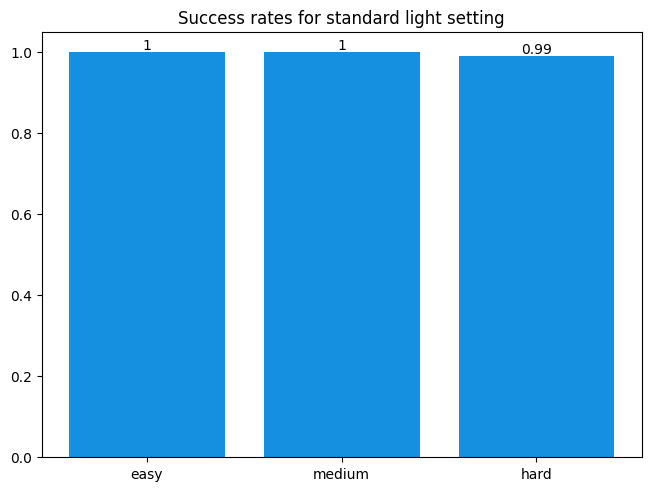

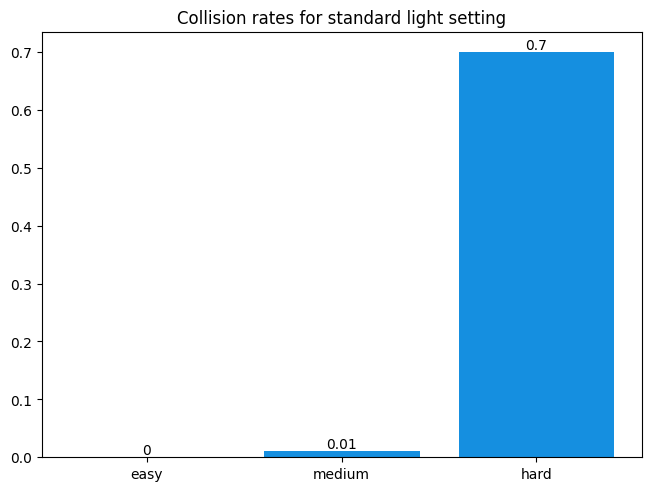

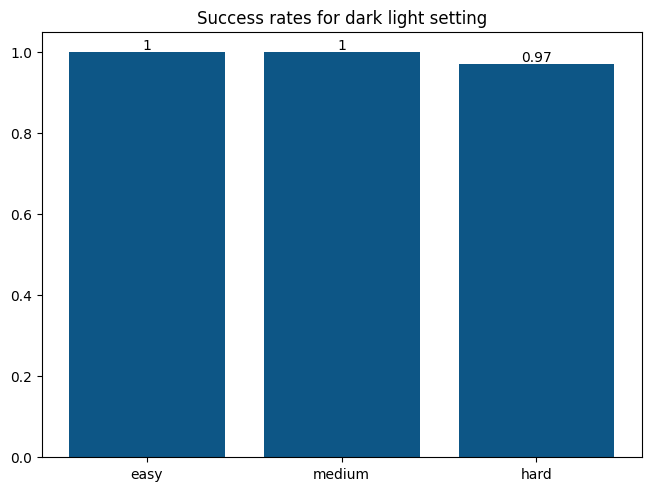

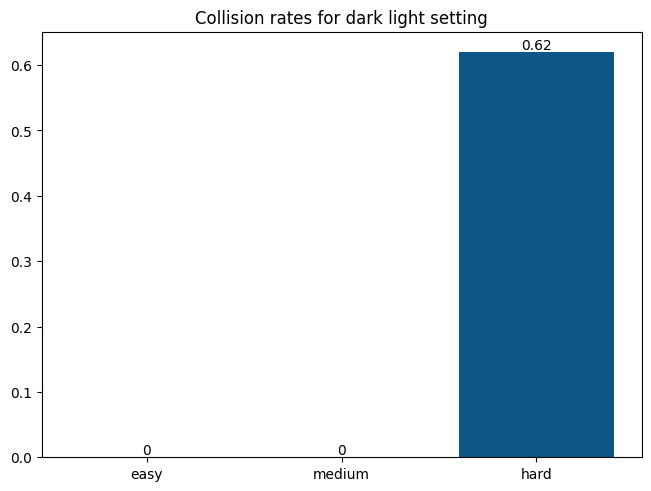

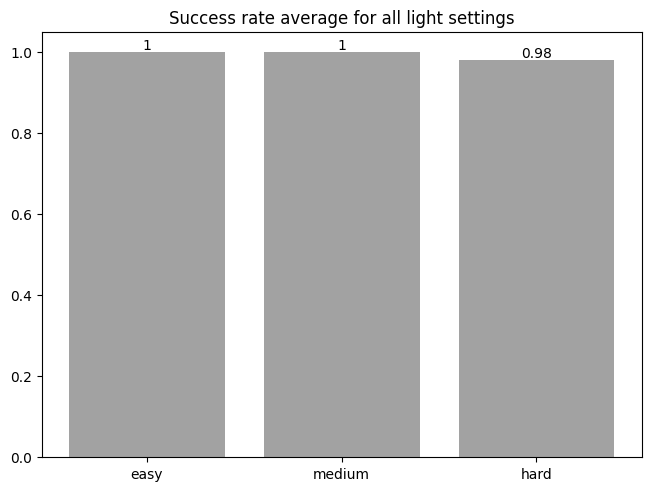

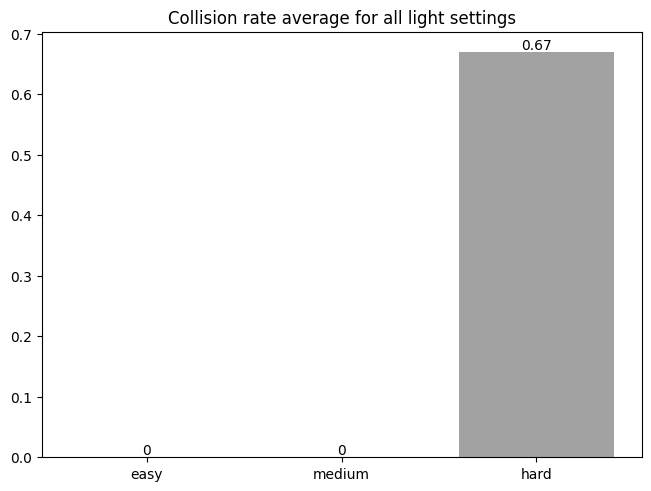

In [9]:
analyse_results_dirs=["success_trainedHardStandardDistanceRewardEval", "trainedHardDistanceMixedLight_eval"]

for analyse_results_dir in analyse_results_dirs:

    light_settings = ["bright","standard","dark"]
    for ls in light_settings:
        light_setting_success_rates_bar_plot(analyse_results_dir, ls, f'Success rates for {ls} light setting')
        light_setting_collision_rates_bar_plot(analyse_results_dir, ls, f'Collision rates for {ls} light setting')

    light_setting_success_rates_bar_plot(analyse_results_dir, "overall", f'Success rate average for all light settings')  
    light_setting_collision_rates_bar_plot(analyse_results_dir, "overall", f'Collision rate average for all light settings')  


# Question 2

success_rates for different light settings

overall success_rate: 0.9933333333333335
overall collision_rate: 0.22555555555555554


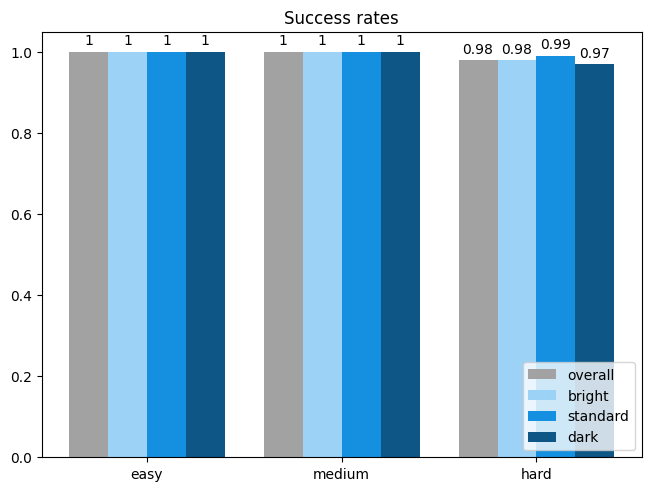

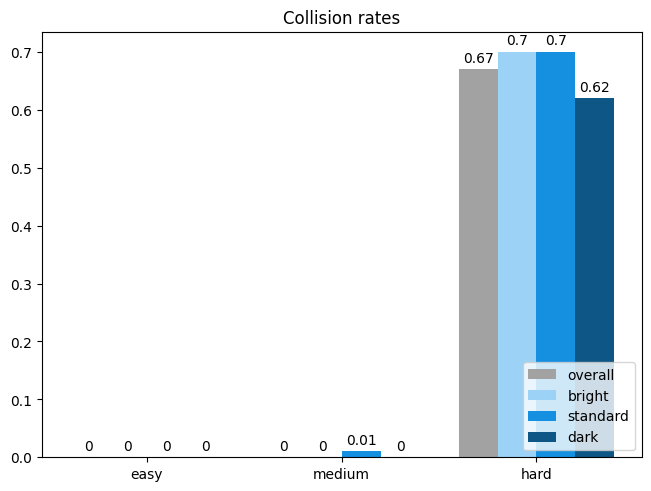

In [10]:
all_success_rates_bar_plot(analyse_results_dir)
all_collision_rates_bar_plot(analyse_results_dir)

## Question 2 without Histogram equalization

overall success_rate: 0.62
overall collision_rate: 0.44555555555555554


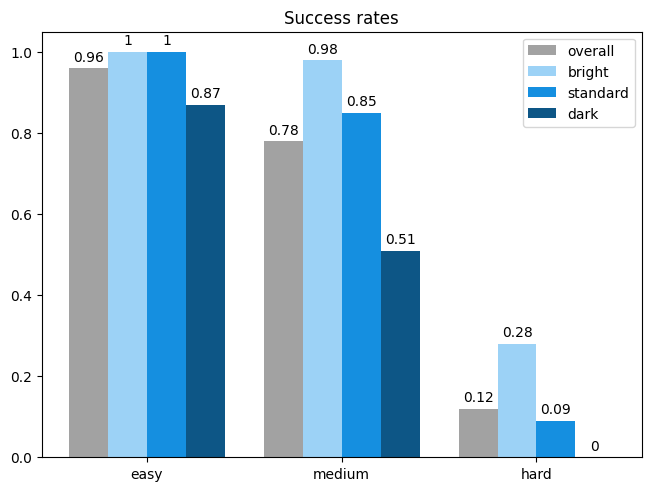

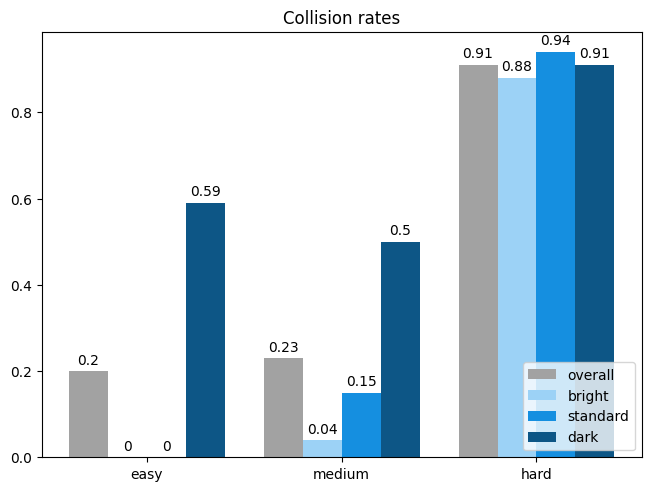

In [11]:
no_hist_eq_results_dir = "success_trainedHardStandardDistanceRewardEval_withoutHistogramEqualization"

all_success_rates_bar_plot(no_hist_eq_results_dir, "upper")
all_collision_rates_bar_plot(no_hist_eq_results_dir)

# Replay times and outputs analysis

In [12]:
replay_dir = "results/replay_hardDistanceSuccess_5_episodes_linux"

min 0.061429500579833984, mean 0.06495326028946369, max 0.208587646484375


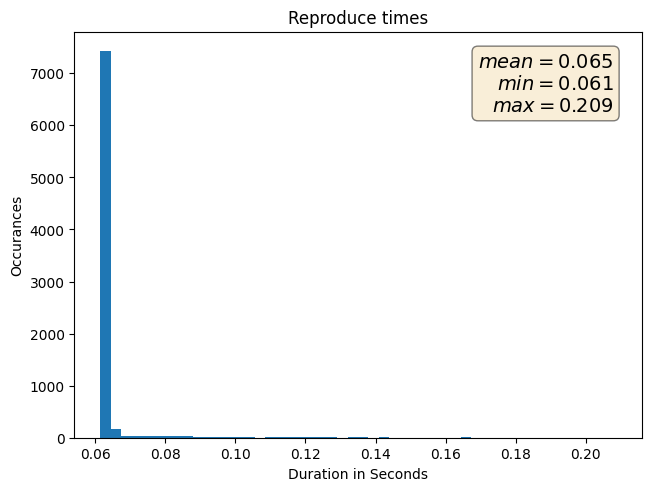

In [13]:
import numpy as np

reproduce_times = np.load(f'{replay_dir}/preprocessing_plus_infer_times.npy')

max_rep_time = np.max(reproduce_times)
min_rep_time = np.min(reproduce_times)
mean_rep_time = np.mean(reproduce_times)

print(f'min {min_rep_time}, mean {mean_rep_time}, max {max_rep_time}')

import matplotlib.pyplot as plt

fig, ax = plt.subplots(layout='constrained')

ax.hist(reproduce_times, bins=(50))

textstr = '\n'.join((
    r'$mean=%.3f$' % (mean_rep_time, ),
    r'$min=%.3f$' % (min_rep_time, ),
    r'$max=%.3f$' % (max_rep_time, )))


# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
ax.text(0.95, 0.95, textstr, transform=ax.transAxes, fontsize=14, horizontalalignment='right',
        verticalalignment='top', bbox=props)

plt.gca().set(title='Reproduce times', ylabel='Occurances', xlabel='Duration in Seconds')
plt.savefig(f'notebook_images/replay_times.png')


In [14]:
def my_histogram(values, title, y_axis_title, filename):
    print(f'{title} min {min(values)}, max {max(values)}, mean {np.mean(values)}, std {np.std(values)}')


    fig, ax = plt.subplots(layout='constrained')

    ax.hist(values, bins=(5))


    textstr = '\n'.join((
        r'$mean=%.3f$' % (np.mean(values), ),
        r'$std=%.3f$' % (np.std(values), ),
        r'$min=%.3f$' % (np.min(values), ),
        r'$max=%.3f$' % (np.max(values), )))


    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    # place a text box in upper left in axes coords
    ax.text(0.95, 0.95, textstr, transform=ax.transAxes, fontsize=14, horizontalalignment='right',
            verticalalignment='top', bbox=props)

    plt.gca().set(title=title, ylabel='Occurances', xlabel='absolute difference')
    plt.savefig(filename)

left action differences min [0.], max [2.3841858e-07], mean 1.1920928955078125e-07, std 1.1920928955078125e-07
right action differences min [2.3841858e-07], max [4.7683716e-07], mean 3.5762786865234375e-07, std 1.1920928955078125e-07


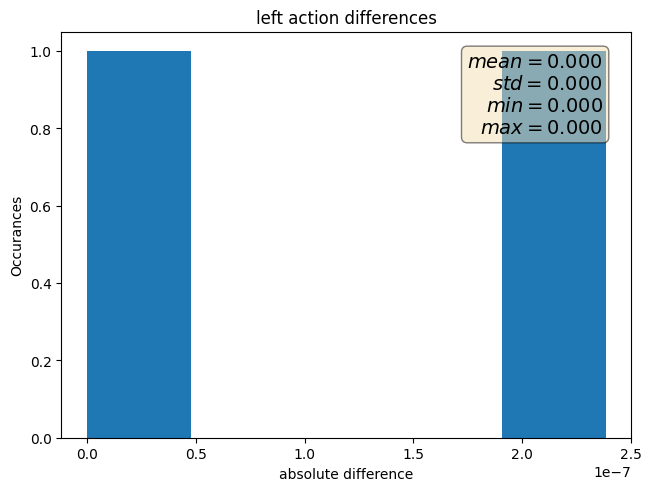

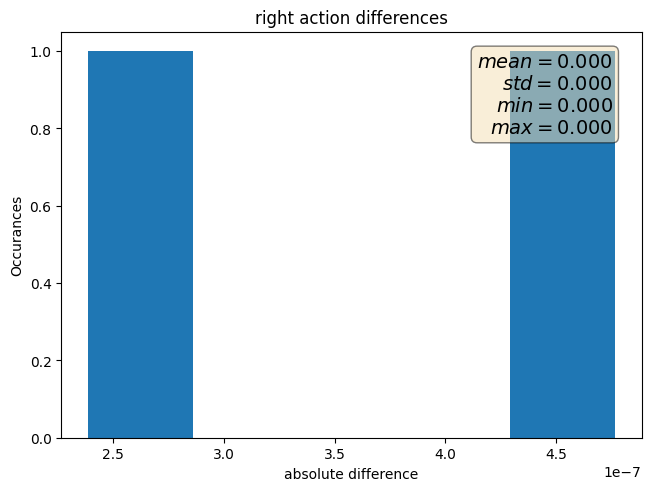

In [15]:
recorded_action_outputs = np.load(f'{replay_dir}\\recorded_actions.npy')
reproduced_action_outputs = np.load(f'{replay_dir}\\reproduced_actions.npy')

differences = np.abs(recorded_action_outputs - reproduced_action_outputs)

left_differences = differences[0,:]
right_differences = differences[1,:]

my_histogram(left_differences, "left action differences", "Occurences", f'notebook_images/replay_outputs_action_left.png')
my_histogram(right_differences, "right action differences", "Occurences", f'notebook_images/replay_outputs_action_right.png')